# Import Package 

!pip install dateparser

In [2]:
import requests
import dateparser
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup 

# Get Content 

In [3]:
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

In [4]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.co'

In [5]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

# Parse Data 

In [7]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,


In [8]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>]

In [9]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip() #for removing the excess whitespace
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = bid.strip() #for removing the excess whitespace
    
    temp.append((tanggal, ask, bid)) 
    
temp 

[('31\xa0Desember\xa02019', '128,62', '127,32'),
 ('30\xa0Desember\xa02019', '128,30', '127,02'),
 ('27\xa0Desember\xa02019', '128,11', '126,83'),
 ('26\xa0Desember\xa02019', '128,27', '126,98'),
 ('23\xa0Desember\xa02019', '128,39', '127,10'),
 ('20\xa0Desember\xa02019', '128,63', '127,34'),
 ('19\xa0Desember\xa02019', '128,24', '126,93'),
 ('18\xa0Desember\xa02019', '128,64', '127,32'),
 ('17\xa0Desember\xa02019', '128,62', '127,33'),
 ('16\xa0Desember\xa02019', '128,67', '127,36'),
 ('13\xa0Desember\xa02019', '128,30', '127,02'),
 ('12\xa0Desember\xa02019', '130,04', '128,71'),
 ('11\xa0Desember\xa02019', '129,65', '128,34'),
 ('10\xa0Desember\xa02019', '129,56', '128,26'),
 ('09\xa0Desember\xa02019', '129,76', '128,44'),
 ('06\xa0Desember\xa02019', '129,78', '128,45'),
 ('05\xa0Desember\xa02019', '130,10', '128,77'),
 ('04\xa0Desember\xa02019', '130,79', '129,45'),
 ('03\xa0Desember\xa02019', '130,15', '128,82'),
 ('02\xa0Desember\xa02019', '129,36', '128,04'),
 ('29\xa0November\xa

In [10]:
temp = temp[::-1]
temp

[('02\xa0Januari\xa02019', '132,89', '131,54'),
 ('03\xa0Januari\xa02019', '135,44', '134,08'),
 ('04\xa0Januari\xa02019', '133,51', '132,17'),
 ('07\xa0Januari\xa02019', '130,86', '129,51'),
 ('08\xa0Januari\xa02019', '129,84', '128,52'),
 ('09\xa0Januari\xa02019', '130,31', '129,00'),
 ('10\xa0Januari\xa02019', '131,22', '129,88'),
 ('11\xa0Januari\xa02019', '130,62', '129,31'),
 ('14\xa0Januari\xa02019', '130,52', '129,19'),
 ('15\xa0Januari\xa02019', '130,56', '129,23'),
 ('16\xa0Januari\xa02019', '131,11', '129,75'),
 ('17\xa0Januari\xa02019', '130,61', '129,27'),
 ('18\xa0Januari\xa02019', '130,37', '129,03'),
 ('21\xa0Januari\xa02019', '130,31', '128,98'),
 ('22\xa0Januari\xa02019', '130,39', '129,07'),
 ('23\xa0Januari\xa02019', '130,05', '128,75'),
 ('24\xa0Januari\xa02019', '129,79', '128,48'),
 ('25\xa0Januari\xa02019', '129,68', '128,37'),
 ('28\xa0Januari\xa02019', '128,97', '127,65'),
 ('29\xa0Januari\xa02019', '129,74', '128,43'),
 ('30\xa0Januari\xa02019', '129,79', '12

# Create DataFrame 

In [11]:
df = pd.DataFrame(temp, columns = ('tanggal', 'ask', 'bid'))
df.head()

,tanggal,ask,bid
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [12]:
df['ask'] = df['ask'].str.replace(",",".")
df['ask'] = df['ask'].astype('float64')
df['bid'] = df['bid'].str.replace(",",".")
df['bid'] = df['bid'].astype('float64')
df['bid'] = df['bid'].astype('float64')

In [13]:
df['tanggal'] = df['tanggal'].replace('Januari', 'January', regex=True)
df['tanggal'] = df['tanggal'].replace('Februari', 'February', regex=True)
df['tanggal'] = df['tanggal'].replace('Maret', 'March', regex=True)
df['tanggal'] = df['tanggal'].replace('April', 'April', regex=True)
df['tanggal'] = df['tanggal'].replace('Mei', 'May', regex=True)
df['tanggal'] = df['tanggal'].replace('Juni', 'June', regex=True)
df['tanggal'] = df['tanggal'].replace('Juli', 'July', regex=True)
df['tanggal'] = df['tanggal'].replace('Agustus', 'August', regex=True)
df['tanggal'] = df['tanggal'].replace('September', 'September', regex=True)
df['tanggal'] = df['tanggal'].replace('Oktober', 'October', regex=True)
df['tanggal'] = df['tanggal'].replace('November', 'November', regex=True)
df['tanggal'] = df['tanggal'].replace('Desember', 'December', regex=True)
df['tanggal'] = df['tanggal'].astype('datetime64')
df.dtypes
df

,tanggal,ask,bid
0,2019-01-02,132.89,131.54
1,2019-01-03,135.44,134.08
2,2019-01-04,133.51,132.17
3,2019-01-07,130.86,129.51
4,2019-01-08,129.84,128.52
...,...,...,...
241,2019-12-23,128.39,127.10
242,2019-12-26,128.27,126.98
243,2019-12-27,128.11,126.83
244,2019-12-30,128.30,127.02


# Plot Data 

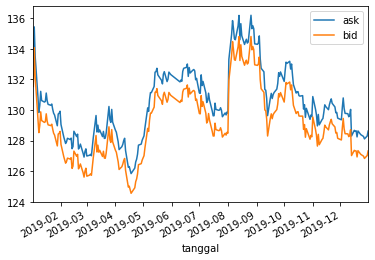

In [14]:
df.plot.line(x='tanggal')

# Analyse Data

Rupiah fluctuated in 10 - 15 range to Japanese Yen throughout 2019 due to internal and external factors such as:
1. general election - there was large demonstration to incumbent
2.
3.